## CARGA DE DATOS

In [1]:
%%capture
!pip install rarfile
!sudo apt-get install unrar

In [2]:
import rarfile
import pandas as pd
#import dask.dataframe as dd

In [3]:
path = '/content/Datos_CDSL_v0.0.1.rar'

# Descomprimir el archivo RAR
with rarfile.RarFile(path, 'r') as rar_ref:
    rar_ref.extractall('datos')

In [4]:
import os

# Define la ruta de la carpeta
carpeta_datasets = '/content/datasets'

# Crea la carpeta si no existe
if not os.path.exists(carpeta_datasets):
    os.makedirs(carpeta_datasets)
    print(f"Carpeta '{carpeta_datasets}' creada con éxito.")
else:
    print(f"La carpeta '{carpeta_datasets}' ya existe.")

Carpeta '/content/datasets' creada con éxito.


## Primer Dataset

In [5]:
# Cargar archivos
df_01 = pd.read_csv('/content/datos/24_04_2020/01.csv', encoding="ISO-8859-1", sep=";")
df_cdsl = pd.read_csv('/content/datos/20_07_2020/CDSL_01.csv', encoding="ISO-8859-1", sep="|")
df_covid = pd.read_csv('/content/datos/19_04_2021/COVID_DSL_01.CSV', encoding="ISO-8859-1", sep="|")

In [6]:
df_01.head(1)

,PATIENT ID,EDAD/AGE,SEXO/SEX,DIAG ING/INPAT,F_INGRESO/ADMISSION_D_ING/INPAT,F_ENTRADA_UC/ICU_DATE_IN,F_SALIDA_UCI/ICU_DATE_OUT,UCI_DIAS/ICU_DAYS,F_ALTA/DISCHARGE_DATE_ING,MOTIVO_ALTA/DESTINY_DISCHARGE_ING,...,SAT_02_PRIMERA/FIRST_URG/EMERG,TA_MAX_PRIMERA/FIRST/EMERG_URG,TA_MIN_PRIMERA/FIRST_URG/EMERG,HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG,FC/HR_ULTIMA/LAST_URG/EMERG,TEMP_ULTIMA/LAST_URG/EMERG,GLU_ULTIMA/LAST_URG/EMERG,SAT_02_ULTIMA/LAST_URG/EMERG,TA_MAX_ULTIMA/LAST_URGEMERG,TA_MIN_ULTIMA/LAST_URG/EMERG
0,577,78,MALE,COVID19 - POSITIVO,26/12/2019,26/12/2019 17:12,27/12/2019 12:22,1.0,02/04/2020,Domicilio,...,0,0,0,NaN,0,0,0,0,0,0


In [7]:
df_cdsl.head(1)

,EDAD,SEX,IDINGRESO,F_INGRESO_ING,F_ALTA_ING,MOTIVO_ALTA_ING,DIAGNOSTICO_ING,F_INGRESO_URG,HORA_URG,DIAG_URG,...,GLU_ULTIMA_URG,DESTINO_URG,IDCDSL,F_ING_ANT,DIAG_ANT,RESPIRADOR,F_UCI_IN,F_UCI_OUT,UCI_DAYS,UCI_N_ING
0,85,MALE,1,06-04-2020 00:00:00,11-04-2020 00:00:00,Fallecimiento,COVID CONFIRMADO,2020-04-06,19:05:00,DIFICULTAD RESPIRATORIA,...,0,Ingreso,NaN,NaN,NaN,SI,NaN,NaN,0,NaN


In [8]:
df_covid.head(1)

,EDAD,SEX,IDINGRESO,F_INGRESO_ING,F_ALTA_ING,MOTIVO_ALTA_ING,DIAGNOSTICO_ING,F_INGRESO_URG,HORA_URG,DIAG_URG,...,GLU_ULTIMA_URG,DESTINO_URG,IDCDSL,F_ING_ANT,DIAG_ANT,RESPIRADOR,F_UCI_IN,F_UCI_OUT,UCI_DAYS,UCI_N_ING
0,55,MALE,508,2020-04-05 00:00:00,2020-04-15 00:00:00,Domicilio,COVID CONFIRMADO,05/04/2020,22:28,DIFICULTAD RESPIRATORIA,...,0,Ingreso,508,NaN,NaN,SI,NaN,NaN,NaN,NaN


In [9]:
# --- Mapeo de columnas hacia los nombres oficiales del PDF ---
harmonized_column_map = {
    # ID y demografía
    "PATIENT ID": "PATIENT ID",
    "IDINGRESO": "PATIENT ID",
    "EDAD": "EDAD/AGE",
    "EDAD/AGE": "EDAD/AGE",
    "SEX": "SEXO/SEX",
    "SEXO/SEX": "SEXO/SEX",

    # Diagnóstico
    "DIAG_ANT": "DIAG ING/INPAT",
    "DIAG ING/INPAT": "DIAG ING/INPAT",
    "DIAG_URG": "DIAG_URG/EMERG",

    # Fechas y tiempos de ingreso y alta
    "F_INGRESO_ING": "F_INGRESO/ADMISSION_D_ING/INPAT",
    "F_INGRESO/ADMISSION_D_ING/INPAT": "F_INGRESO/ADMISSION_D_ING/INPAT",
    "F_ALTA_ING": "F_ALTA/DISCHARGE_DATE_ING",
    "F_ALTA/DISCHARGE_DATE_ING": "F_ALTA/DISCHARGE_DATE_ING",
    "MOTIVO_ALTA_ING": "MOTIVO_ALTA/DESTINY_DISCHARGE_ING",

    # UCI
    "F_UCI_IN": "F_ENTRADA_UC/ICU_DATE_IN",
    "F_ENTRADA_UC/ICU_DATE_IN": "F_ENTRADA_UC/ICU_DATE_IN",
    "F_UCI_OUT": "F_SALIDA_UCI/ICU_DATE_OUT",
    "F_SALIDA_UCI/ICU_DATE_OUT": "F_SALIDA_UCI/ICU_DATE_OUT",
    "UCI_DAYS": "UCI_DIAS/ICU_DAYS",
    "UCI_DIAS/ICU_DAYS": "UCI_DIAS/ICU_DAYS",

    # Urgencias
    "F_INGRESO_URG": "F_INGRESO/ADMISSION_DATE_URG/EMERG",
    "F_INGRESO/ADMISSION_DATE_URG/EMERG": "F_INGRESO/ADMISSION_DATE_URG/EMERG",
    "HORA_URG": "HORA/TIME_ADMISION/ADMISSION_URG/EMERG",
    "HORA/TIME_ADMISION/ADMISSION_URG/EMERG": "HORA/TIME_ADMISION/ADMISSION_URG/EMERG",
    "ESPECIALIDAD_URGENCIA": "ESPECIALIDAD/DEPARTMENT_URG/EMERG",
    "ESPECIALIDAD/DEPARTMENT_URG/EMERG": "ESPECIALIDAD/DEPARTMENT_URG/EMERG",
    "DESTINO_URG": "DESTINO/DESTINY_URG/EMERG",
    "DESTINO/DESTINY_URG/EMERG": "DESTINO/DESTINY_URG/EMERG",

    # Constantes urgencias (primeras y últimas)
    "TEMP_PRIMERA_URG": "TEMP_PRIMERA/FIRST_URG/EMERG",
    "TEMP_PRIMERA/FIRST_URG/EMERG": "TEMP_PRIMERA/FIRST_URG/EMERG",
    "TEMP_ULTIMA_URG": "TEMP_ULTIMA/LAST_URG/EMERG",
    "TEMP_ULTIMA/LAST_URG/EMERG": "TEMP_ULTIMA/LAST_URG/EMERG",

    "FC_PRIMERA_URG": "FC/HR_PRIMERA/FIRST_URG/EMERG",
    "FC/HR_PRIMERA/FIRST_URG/EMERG": "FC/HR_PRIMERA/FIRST_URG/EMERG",
    "FC_ULTIMA_URG": "FC/HR_ULTIMA/LAST_URG/EMERG",
    "FC/HR_ULTIMA/LAST_URG/EMERG": "FC/HR_ULTIMA/LAST_URG/EMERG",

    "GLU_PRIMERA_URG": "GLU_PRIMERA/FIRST_URG/EMERG",
    "GLU_PRIMERA/FIRST_URG/EMERG": "GLU_PRIMERA/FIRST_URG/EMERG",
    "GLU_ULTIMA_URG": "GLU_ULTIMA/LAST_URG/EMERG",
    "GLU_ULTIMA/LAST_URG/EMERG": "GLU_ULTIMA/LAST_URG/EMERG",

    "SAT_02_PRIMERA_URG": "SAT_02_PRIMERA/FIRST_URG/EMERG",
    "SAT_02_PRIMERA/FIRST_URG/EMERG": "SAT_02_PRIMERA/FIRST_URG/EMERG",
    "SAT_02_ULTIMA_URG": "SAT_02_ULTIMA/LAST_URG/EMERG",
    "SAT_02_ULTIMA/LAST_URG/EMERG": "SAT_02_ULTIMA/LAST_URG/EMERG",

    "TA_MAX_PRIMERA_URG": "TA_MAX_PRIMERA/FIRST/EMERG_URG",
    "TA_MAX_PRIMERA/FIRST/EMERG_URG": "TA_MAX_PRIMERA/FIRST/EMERG_URG",
    "TA_MAX_ULTIMA_URG": "TA_MAX_ULTIMA/LAST_URGEMERG",
    "TA_MAX_ULTIMA/LAST_URGEMERG": "TA_MAX_ULTIMA/LAST_URGEMERG",

    "TA_MIN_PRIMERA_URG": "TA_MIN_PRIMERA/FIRST_URG/EMERG",
    "TA_MIN_PRIMERA/FIRST_URG/EMERG": "TA_MIN_PRIMERA/FIRST_URG/EMERG",
    "TA_MIN_ULTIMA_URG": "TA_MIN_ULTIMA/LAST_URG/EMERG",
    "TA_MIN_ULTIMA/LAST_URG/EMERG": "TA_MIN_ULTIMA/LAST_URG/EMERG",

    "HORA_CONSTANTES_PRIMERA_URG": "HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG",
    "HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG": "HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG",
    "HORA_CONSTANTES_ULTIMA_URG": "HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG",
    "HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG": "HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG"
}


# --- Renombrar columnas en los datasets ---
df_01.rename(columns=harmonized_column_map, inplace=True)
df_cdsl.rename(columns=harmonized_column_map, inplace=True)
df_covid.rename(columns=harmonized_column_map, inplace=True)

In [10]:
dfs = [df_01, df_cdsl, df_covid]

# Encontrar columnas comunes a todos los DataFrames
common_columns = list(set.intersection(*[set(df.columns) for df in dfs]))
print('columnas comunes: ', common_columns)
print(len(common_columns))

columnas comunes:  ['GLU_PRIMERA/FIRST_URG/EMERG', 'SAT_02_ULTIMA/LAST_URG/EMERG', 'GLU_ULTIMA/LAST_URG/EMERG', 'EDAD/AGE', 'ESPECIALIDAD/DEPARTMENT_URG/EMERG', 'TA_MAX_ULTIMA/LAST_URGEMERG', 'HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG', 'TEMP_ULTIMA/LAST_URG/EMERG', 'F_ENTRADA_UC/ICU_DATE_IN', 'HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG', 'SEXO/SEX', 'F_INGRESO/ADMISSION_D_ING/INPAT', 'DIAG ING/INPAT', 'FC/HR_ULTIMA/LAST_URG/EMERG', 'TEMP_PRIMERA/FIRST_URG/EMERG', 'F_ALTA/DISCHARGE_DATE_ING', 'MOTIVO_ALTA/DESTINY_DISCHARGE_ING', 'F_SALIDA_UCI/ICU_DATE_OUT', 'DESTINO/DESTINY_URG/EMERG', 'HORA/TIME_ADMISION/ADMISSION_URG/EMERG', 'PATIENT ID', 'TA_MAX_PRIMERA/FIRST/EMERG_URG', 'UCI_DIAS/ICU_DAYS', 'F_INGRESO/ADMISSION_DATE_URG/EMERG', 'FC/HR_PRIMERA/FIRST_URG/EMERG', 'TA_MIN_ULTIMA/LAST_URG/EMERG', 'SAT_02_PRIMERA/FIRST_URG/EMERG', 'DIAG_URG/EMERG', 'TA_MIN_PRIMERA/FIRST_URG/EMERG']
29


In [11]:
print(set(df_01.columns) == set(df_cdsl.columns) == set(df_covid.columns))


False


In [12]:
# Filtrar y concatenar solo columnas comunes
dfs_common = [df[common_columns] for df in dfs]
df_final = pd.concat(dfs_common, ignore_index=True, sort=False)

# Guardar resultado
df_final.to_csv("/content/datasets/dataset_1.csv", index=False, encoding="utf-8")

In [13]:
# Ordenar columnas según el orden deseado (29 columnas en mayúsculas)
column_order = [
    "PATIENT ID", "EDAD/AGE", "SEXO/SEX", "DIAG ING/INPAT",
    "F_INGRESO/ADMISSION_D_ING/INPAT", "F_ENTRADA_UC/ICU_DATE_IN",
    "F_SALIDA_UCI/ICU_DATE_OUT", "UCI_DIAS/ICU_DAYS",
    "F_ALTA/DISCHARGE_DATE_ING", "MOTIVO_ALTA/DESTINY_DISCHARGE_ING",
    "F_INGRESO/ADMISSION_DATE_URG/EMERG",
    "HORA/TIME_ADMISION/ADMISSION_URG/EMERG",
    "ESPECIALIDAD/DEPARTMENT_URG/EMERG", "DIAG_URG/EMERG",
    "DESTINO/DESTINY_URG/EMERG",
    "HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG",
    "TEMP_PRIMERA/FIRST_URG/EMERG", "FC/HR_PRIMERA/FIRST_URG/EMERG",
    "GLU_PRIMERA/FIRST_URG/EMERG", "SAT_02_PRIMERA/FIRST_URG/EMERG",
    "TA_MAX_PRIMERA/FIRST/EMERG_URG", "TA_MIN_PRIMERA/FIRST_URG/EMERG",
    "HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG",
    "FC/HR_ULTIMA/LAST_URG/EMERG", "TEMP_ULTIMA/LAST_URG/EMERG",
    "GLU_ULTIMA/LAST_URG/EMERG", "SAT_02_ULTIMA/LAST_URG/EMERG",
    "TA_MAX_ULTIMA/LAST_URGEMERG", "TA_MIN_ULTIMA/LAST_URG/EMERG"
]

In [14]:
df1 = pd.read_csv("/content/datasets/dataset_1.csv", usecols=column_order)
df1.head(7)

,GLU_PRIMERA/FIRST_URG/EMERG,SAT_02_ULTIMA/LAST_URG/EMERG,GLU_ULTIMA/LAST_URG/EMERG,EDAD/AGE,ESPECIALIDAD/DEPARTMENT_URG/EMERG,TA_MAX_ULTIMA/LAST_URGEMERG,HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG,TEMP_ULTIMA/LAST_URG/EMERG,F_ENTRADA_UC/ICU_DATE_IN,HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG,...,HORA/TIME_ADMISION/ADMISSION_URG/EMERG,PATIENT ID,TA_MAX_PRIMERA/FIRST/EMERG_URG,UCI_DIAS/ICU_DAYS,F_INGRESO/ADMISSION_DATE_URG/EMERG,FC/HR_PRIMERA/FIRST_URG/EMERG,TA_MIN_ULTIMA/LAST_URG/EMERG,SAT_02_PRIMERA/FIRST_URG/EMERG,DIAG_URG/EMERG,TA_MIN_PRIMERA/FIRST_URG/EMERG
0,0,0,0,78,NaN,0,NaN,0,26/12/2019 17:12,NaN,...,NaN,577,0,1.0,NaN,0,0,0,NaN,0
1,0,0,0,75,NaN,0,NaN,0,30/01/2020 13:03,NaN,...,NaN,44,0,1.0,NaN,0,0,0,NaN,0
2,0,97,0,62,Medicina de Urgencias,160,18:27:00,0,10/03/2020 14:20,18:34:00,...,18:21:00,585,160,10.0,05/02/2020,105,101,97,DOLOR COSTAL,101
3,0,95,0,69,Medicina de Urgencias,141,15:35:00,37,NaN,18:54:00,...,15:27:00,587,141,NaN,06/02/2020,92,83,95,DETERIORO PACIENTE ONCOLàGICO,83
4,0,93,0,67,Medicina Interna,151,0:41:00,36,NaN,0:55:00,...,0:34:00,586,151,NaN,06/02/2020,84,82,93,DIFICULTAD RESPIRATORIA,82
5,0,99,0,72,Medicina de Urgencias,146,0:46:00,"37,79999924",NaN,0:57:00,...,0:38:00,588,146,NaN,24/02/2020,80,71,99,DETERIORO PACIENTE ONCOLàGICO,71
6,0,0,0,55,Medicina de Urgencias,0,9:59:00,0,NaN,8:58:00,...,8:39:00,589,0,NaN,27/02/2020,0,0,0,CUADRO CATARRAL,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GLU_PRIMERA/FIRST_URG/EMERG                 9333 non-null   int64  
 1   SAT_02_ULTIMA/LAST_URG/EMERG                9333 non-null   int64  
 2   GLU_ULTIMA/LAST_URG/EMERG                   9333 non-null   int64  
 3   EDAD/AGE                                    9333 non-null   int64  
 4   ESPECIALIDAD/DEPARTMENT_URG/EMERG           8968 non-null   object 
 5   TA_MAX_ULTIMA/LAST_URGEMERG                 9333 non-null   int64  
 6   HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG  7540 non-null   object 
 7   TEMP_ULTIMA/LAST_URG/EMERG                  9333 non-null   object 
 8   F_ENTRADA_UC/ICU_DATE_IN                    845 non-null    object 
 9   HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG    8966 non-null   object 
 10  SEXO/SEX    

## Segundo dataset

In [16]:
# --- Cargar los datasets ---
df_02 = pd.read_csv('/content/datos/24_04_2020/02.csv', encoding="ISO-8859-1", sep=";")
df_cdsl2 = pd.read_csv('/content/datos/20_07_2020/CDSL_02.csv', encoding="ISO-8859-1", sep="|")
COVID_DSL_04 = pd.read_csv("/content/datos/19_04_2021/COVID_DSL_04.CSV", encoding="ISO-8859-1", sep="|")


In [17]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60460 entries, 0 to 60459
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   PATIENT ID                                    60460 non-null  int64 
 1   FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME  60460 non-null  object
 2   DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE            60460 non-null  int64 
 3   INICIO_TRAT/DRUG_START_DATE                   60460 non-null  object
 4   FIN_TRAT/DRUG_END_DATE                        60460 non-null  object
 5   ATC5_NOMBRE/NAME                              60460 non-null  object
 6   ID_ATC5                                       60460 non-null  object
 7   ATC7_NOMBRE/NAME                              60458 non-null  object
 8   ID_ATC7                                       60458 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.2+ MB


In [18]:
df_cdsl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75632 entries, 0 to 75631
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IDINGRESO            75632 non-null  int64 
 1   DRUG_COMERCIAL_NAME  75632 non-null  object
 2   ID_ATC5              75632 non-null  object
 3   ATC5_NAME            75632 non-null  object
 4   ID_ATC7              75630 non-null  object
 5   ATC7_NAME            75630 non-null  object
 6   DAILY_AVRG_DOSE      75632 non-null  int64 
 7   DRUG_START_DATE      75632 non-null  object
 8   DRUG_END_DATE        75632 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.2+ MB


In [19]:
COVID_DSL_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115649 entries, 0 to 115648
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   IDINGRESO            115649 non-null  int64 
 1   DRUG_COMERCIAL_NAME  115649 non-null  object
 2   ID_ATC5              115649 non-null  object
 3   ATC5_NAME            115649 non-null  object
 4   ID_ATC7              115648 non-null  object
 5   ATC7_NAME            115648 non-null  object
 6   DAILY_AVRG_DOSE      115649 non-null  int64 
 7   DRUG_START_DATE      115649 non-null  object
 8   DRUG_END_DATE        115649 non-null  object
dtypes: int64(2), object(7)
memory usage: 7.9+ MB


In [20]:
# --- Mapeo unificado basado en los nombres del PDF oficial ---
harmonized_column_map = {
    # ID
    "PATIENT ID": "PATIENT ID",
    "IDINGRESO": "PATIENT ID",

    # Medicación
    "FARMACO/DRUG_NOMBRE_COMERCIAL/COMMERCIAL_NAME": "FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME",
    "DRUG_COMERCIAL_NAME": "FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME",

    "DAILY_AVRG_DOSE": "DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE",
    "DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE": "DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE",

    "START_DATE": "INICIO_TRAT/DRUG_START_DATE",
    "F_INICIO/START_DATE": "INICIO_TRAT/DRUG_START_DATE",
    "DRUG_START_DATE": "INICIO_TRAT/DRUG_START_DATE",

    "END_DATE": "FIN_TRAT/DRUG_END_DATE",
    "F_FINAL/END_DATE": "FIN_TRAT/DRUG_END_DATE",
    "DRUG_END_DATE": "FIN_TRAT/DRUG_END_DATE",

    "ATC5_NAME": "ATC5_NOMBRE/NAME",
    "ATC5_NOMBRE/NAME": "ATC5_NOMBRE/NAME",

    "ID_ATC5": "ID_ATC5",
    "ATC5": "ID_ATC5",

    "ATC7_NAME": "ATC7_NOMBRE/NAME",
    "ATC7_NOMBRE/NAME": "ATC7_NOMBRE/NAME",

    "ID_ATC7": "ID_ATC7",

}

# --- Renombrar columnas en cada dataset ---
df_02.rename(columns=harmonized_column_map, inplace=True)
df_cdsl2.rename(columns=harmonized_column_map, inplace=True)
COVID_DSL_04.rename(columns=harmonized_column_map, inplace=True)


In [21]:
print(set(df_02.columns) == set(df_cdsl2.columns) == set(COVID_DSL_04.columns))

True


In [22]:
dfs2 = [df_02, df_cdsl2, COVID_DSL_04]

# Encontrar columnas comunes a todos los DataFrames
common_columns2 = list(set.intersection(*[set(df.columns) for df in dfs2]))
print('columnas comunes: ', common_columns2)
print(len(common_columns2))

columnas comunes:  ['DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE', 'INICIO_TRAT/DRUG_START_DATE', 'ID_ATC7', 'FIN_TRAT/DRUG_END_DATE', 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME', 'ATC7_NOMBRE/NAME', 'ID_ATC5', 'PATIENT ID', 'ATC5_NOMBRE/NAME']
9


In [23]:
# Filtrar y concatenar solo columnas comunes
dfs_common2 = [df[common_columns2] for df in dfs2]
df_final2 = pd.concat(dfs_common2, ignore_index=True, sort=False)

# Guardar resultado
df_final2.to_csv("/content/datasets/dataset_2.csv", index=False, encoding="utf-8")

In [24]:
df2 = pd.read_csv("/content/datasets/dataset_2.csv")
df2.head()

,DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE,INICIO_TRAT/DRUG_START_DATE,ID_ATC7,FIN_TRAT/DRUG_END_DATE,FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME,ATC7_NOMBRE/NAME,ID_ATC5,PATIENT ID,ATC5_NOMBRE/NAME
0,5,10/04/2020,N02AA01,10/04/2020,MORFINA amp 1% 1 mL (10 mg/1 mL),MORFINA,N02AA,1,ALCALOIDES NATURALES DEL OPIO
1,2,06/04/2020,P01BA02,10/04/2020,DOLQUINE comp 200 mg,HIDROXICLOROQUINA,P01BA,1,AMINOQUINOLINAS
2,3,07/04/2020,N02BE01,10/04/2020,PARACETAMOL comp 1 g,PARACETAMOL,N02BE,1,ANILIDAS
3,4,07/04/2020,J05AE20,07/04/2020,KALETRA/ALUVIA comp (200+50) mg,RITONAVIR Y LOPINAVIR,J05AR,1,ANTIVIRALES PARA EL TRATAMIENTO DE INFECCIONES...
4,2,06/04/2020,D08AC02,06/04/2020,DESINCLOR JABONOSO sol 4% F/500 mL,CLORHEXIDINA,D08AC,1,BIGUANIDAS Y AMIDINAS


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251741 entries, 0 to 251740
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE            251741 non-null  int64 
 1   INICIO_TRAT/DRUG_START_DATE                   251741 non-null  object
 2   ID_ATC7                                       251736 non-null  object
 3   FIN_TRAT/DRUG_END_DATE                        251741 non-null  object
 4   FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME  251741 non-null  object
 5   ATC7_NOMBRE/NAME                              251736 non-null  object
 6   ID_ATC5                                       251741 non-null  object
 7   PATIENT ID                                    251741 non-null  int64 
 8   ATC5_NOMBRE/NAME                              251741 non-null  object
dtypes: int64(2), object(7)
memory usage: 17.3+ MB


##Tercer Dataset

In [26]:
df_covid2 = pd.read_csv('/content/datos/19_04_2021/COVID_DSL_02.CSV', encoding="ISO-8859-1", sep="|")
CDSL_03 = pd.read_csv('/content/datos/20_07_2020/CDSL_03.csv', encoding="ISO-8859-1", sep="|")
df03 = pd.read_csv('/content/datos/24_04_2020/03.csv', encoding="ISO-8859-1", sep=";")

<ipython-input-26-a5594b956474>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid2 = pd.read_csv('/content/datos/19_04_2021/COVID_DSL_02.CSV', encoding="ISO-8859-1", sep="|")


In [27]:
#df_covid2.info()  # dataset del conjunto 3

In [28]:
#CDSL_03.info()

In [29]:
#df03.info()

In [30]:
# --- Mapeo unificado basado en los nombres del PDF oficial --- conjunto 3
harmonized_column_map = {
    # ID
    "PATIENT ID": "PATIENT ID",
    "IDINGRESO": "PATIENT ID",
    # Constantes clínicas
    "CONSTANTS_ING_DATE": "CONSTANTS_ING/INPAT_FECHA/DATE",
    "CONSTANTS_ING/INPAT_FECHA/DATE": "CONSTANTS_ING/INPAT_FECHA/DATE",

    "CONSTANTS_ING_TIME": "CONSTANTS_ING/INPAT_HORA/TIME",
    "CONSTANTS_ING/INPAT_HORA/TIME": "CONSTANTS_ING/INPAT_HORA/TIME",

    "FC_HR_ING": "FC/HR_ING/INPAT",
    "FC/HR_ING/INPAT": "FC/HR_ING/INPAT",

    "GLU_GLY_ING": "GLU/GLY_ING/INPAT",
    "GLU/GLY_ING/INPAT": "GLU/GLY_ING/INPAT",

    "SAT_02_ING": "SAT_02_ING/INPAT",
    "SAT_02_ING/INPAT": "SAT_02_ING/INPAT",

    "SAT_02_ING_OBS": "SAT_02_ING_OBS",  # No oficial, pero mantenido

    "TA_MAX_ING": "TA_MAX_ING/INPAT",
    "TA_MIN_ING": "TA_MIN_ING/INPAT",
    "TEMP_ING": "TEMP_ING/INPAT"
}

# --- Renombrar columnas en cada dataset ---
df_covid2.rename(columns=harmonized_column_map, inplace=True)
CDSL_03.rename(columns=harmonized_column_map, inplace=True)
df03.rename(columns=harmonized_column_map, inplace=True)

In [31]:
print(set(df_covid2.columns) == set(CDSL_03.columns) == set(df03.columns))

False


In [32]:
dfs3 = [df_covid2, CDSL_03, df03]

# Encontrar columnas comunes a todos los DataFrames
common_columns3 = list(set.intersection(*[set(df.columns) for df in dfs3]))
print('columnas comunes: ', common_columns3)
print(len(common_columns3))


columnas comunes:  ['FC/HR_ING/INPAT', 'TA_MIN_ING/INPAT', 'CONSTANTS_ING/INPAT_FECHA/DATE', 'TA_MAX_ING/INPAT', 'SAT_02_ING/INPAT', 'CONSTANTS_ING/INPAT_HORA/TIME', 'TEMP_ING/INPAT', 'PATIENT ID', 'GLU/GLY_ING/INPAT']
9


In [33]:
# Filtrar y concatenar solo columnas comunes
dfs_common3 = [df[common_columns3] for df in dfs3]
df_final3 = pd.concat(dfs_common3, ignore_index=True, sort=False)

# Guardar resultado
df_final3.to_csv("/content/datasets/dataset_3.csv", index=False, encoding="utf-8")

In [34]:
df3 = pd.read_csv("/content/datasets/dataset_3.csv")
df3.head()

<ipython-input-34-417eb5608dd1>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/content/datasets/dataset_3.csv")


,FC/HR_ING/INPAT,TA_MIN_ING/INPAT,CONSTANTS_ING/INPAT_FECHA/DATE,TA_MAX_ING/INPAT,SAT_02_ING/INPAT,CONSTANTS_ING/INPAT_HORA/TIME,TEMP_ING/INPAT,PATIENT ID,GLU/GLY_ING/INPAT
0,0,0,2021-01-23,0,95,00:28,0,1843,0
1,0,0,2021-01-23,0,91,00:31,0,1764,0
2,0,0,2021-01-23,0,95,00:32,0,1761,0
3,0,0,2021-01-23,0,95,00:32,0,1792,0
4,0,0,2021-01-23,0,99,00:32,0,1225,0


In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407666 entries, 0 to 407665
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   FC/HR_ING/INPAT                 407666 non-null  int64 
 1   TA_MIN_ING/INPAT                407666 non-null  int64 
 2   CONSTANTS_ING/INPAT_FECHA/DATE  407666 non-null  object
 3   TA_MAX_ING/INPAT                407666 non-null  int64 
 4   SAT_02_ING/INPAT                407666 non-null  int64 
 5   CONSTANTS_ING/INPAT_HORA/TIME   407666 non-null  object
 6   TEMP_ING/INPAT                  407666 non-null  object
 7   PATIENT ID                      407666 non-null  int64 
 8   GLU/GLY_ING/INPAT               407666 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 28.0+ MB


## Cuarto Dataset

In [36]:
COVID_DSL_06 = pd.read_csv("/content/datos/19_04_2021/COVID_DSL_06_v2.CSV", encoding="ISO-8859-1", sep=";")
CDSL_04 = pd.read_csv('/content/datos/20_07_2020/CDSL_04.csv', encoding="ISO-8859-1", sep=",")
df04 = pd.read_csv('/content/datos/24_04_2020/04.csv', encoding="ISO-8859-1", sep=";", on_bad_lines='skip')

In [37]:
COVID_DSL_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786984 entries, 0 to 786983
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   IDINGRESO   786984 non-null  int64 
 1   LAB_NUMBER  786984 non-null  object
 2   LAB_DATE    786984 non-null  object
 3   TIME_LAB    786984 non-null  object
 4   ITEM_LAB    786984 non-null  object
 5   VAL_RESULT  785338 non-null  object
 6   UD_RESULT   739100 non-null  object
 7   REF_VALUES  766449 non-null  object
dtypes: int64(1), object(7)
memory usage: 48.0+ MB


In [38]:
CDSL_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584043 entries, 0 to 584042
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   IDINGRESO   584043 non-null  int64 
 1   LAB_NUMBER  584043 non-null  object
 2   LAB_DATE    584043 non-null  object
 3   TIME_LAB    584043 non-null  object
 4   ITEM_LAB    584043 non-null  object
 5   VAL_RESULT  579773 non-null  object
 6   UD_RESULT   545161 non-null  object
 7   REF_VALUES  565606 non-null  object
dtypes: int64(1), object(7)
memory usage: 35.6+ MB


In [39]:
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395858 entries, 0 to 395857
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   PATIENT ID                       395858 non-null  int64 
 1   PETICION_LABORATORIO/LAB_NUMBER  395858 non-null  object
 2   FECHA_PETICION/LAB_DATE          395858 non-null  object
 3   HORA_PETICION/TIME_LAB           395858 non-null  object
 4   DETERMINACION/ITEM_LAB           395858 non-null  object
 5   RESULTADO/VAL_RESULT             395851 non-null  object
 6   UNIDADES/UD_RESULT               373464 non-null  object
 7   VALORES_REFERENCIA/REF_VALUES    386679 non-null  object
dtypes: int64(1), object(7)
memory usage: 24.2+ MB


In [40]:
harmonized_column_map = {
    "PATIENT ID": "PATIENT ID",
    "PETICION_LABORATORIO/LAB_NUMBER": "PETICION_LABORATORIO/LAB_NUMBER",
    "FECHA_PETICION/LAB_DATE": "FECHA_PETICION/LAB_DATE",
    "HORA_PETICION/TIME_LAB": "HORA_PETICION/TIME_LAB",
    "DETERMINACION/ITEM_LAB": "DETERMINACION/ITEM_LAB",
    "RESULTADO/VAL_RESULT": "RESULTADO/VAL_RESULT",
    "UNIDADES/UD_RESULT": "UNIDADES/UD_RESULT",
    "VALORES_REFERENCIA/REF_VALUES": "VALORES_REFERENCIA/REF_VALUES",
    "IDINGRESO": "PATIENT ID",  # Mapear IDINGRESO a PATIENT ID
    "LAB_NUMBER": "PETICION_LABORATORIO/LAB_NUMBER",  # Mapear LAB_NUMBER ...
    "LAB_DATE": "FECHA_PETICION/LAB_DATE",
    "TIME_LAB": "HORA_PETICION/TIME_LAB",
    "ITEM_LAB": "DETERMINACION/ITEM_LAB",
    "VAL_RESULT": "RESULTADO/VAL_RESULT",
    "UD_RESULT": "UNIDADES/UD_RESULT",
    "REF_VALUES": "VALORES_REFERENCIA/REF_VALUES"
}

# --- Renombrar columnas en cada dataset ---
COVID_DSL_06.rename(columns=harmonized_column_map, inplace=True)
CDSL_04.rename(columns=harmonized_column_map, inplace=True)
df04.rename(columns=harmonized_column_map, inplace=True)

In [41]:
print(set(COVID_DSL_06.columns) == set(CDSL_04.columns) == set(df04.columns))

True


In [42]:
dfs4 = [COVID_DSL_06, CDSL_04, df04]

# Encontrar columnas comunes a todos los DataFrames
common_columns4 = list(set.intersection(*[set(df.columns) for df in dfs4]))
print('columnas comunes: ', common_columns4)
print(len(common_columns4))


columnas comunes:  ['HORA_PETICION/TIME_LAB', 'FECHA_PETICION/LAB_DATE', 'VALORES_REFERENCIA/REF_VALUES', 'DETERMINACION/ITEM_LAB', 'PETICION_LABORATORIO/LAB_NUMBER', 'RESULTADO/VAL_RESULT', 'PATIENT ID', 'UNIDADES/UD_RESULT']
8


In [43]:
# Filtrar y concatenar solo columnas comunes
dfs_common4 = [df[common_columns4] for df in dfs4]
df_final4 = pd.concat(dfs_common4, ignore_index=True, sort=False)

# Guardar resultado
df_final4.to_csv("/content/datasets/dataset_4.csv", index=False, encoding="utf-8")

In [44]:
df4 = pd.read_csv("/content/datasets/dataset_4.csv")
df4.head()

,HORA_PETICION/TIME_LAB,FECHA_PETICION/LAB_DATE,VALORES_REFERENCIA/REF_VALUES,DETERMINACION/ITEM_LAB,PETICION_LABORATORIO/LAB_NUMBER,RESULTADO/VAL_RESULT,PATIENT ID,UNIDADES/UD_RESULT
0,00:00,09/12/2020,NaN,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,I-1,Se detecta,1,NaN
1,00:00,11-12-2020,NaN,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,I-1,Se detecta,2,NaN
2,00:00,10-12-2020,NaN,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,I-1,Se detecta,4,NaN
3,00:00,22-12-2020,NaN,G-CORONAV (RT-PCR) -- Tipo de muestra: Exudado...,I-1,Se detecta,5,NaN
4,00:00,10-12-2020,NaN,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,I-1,No se detecta,6,NaN


In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766885 entries, 0 to 1766884
Data columns (total 8 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   HORA_PETICION/TIME_LAB           object
 1   FECHA_PETICION/LAB_DATE          object
 2   VALORES_REFERENCIA/REF_VALUES    object
 3   DETERMINACION/ITEM_LAB           object
 4   PETICION_LABORATORIO/LAB_NUMBER  object
 5   RESULTADO/VAL_RESULT             object
 6   PATIENT ID                       int64 
 7   UNIDADES/UD_RESULT               object
dtypes: int64(1), object(7)
memory usage: 107.8+ MB


## Quinto Dataset

In [46]:
CDSL_05 = pd.read_csv('/content/datos/20_07_2020/CDSL_05.csv', encoding="ISO-8859-1", sep="|")
df05 = pd.read_csv('/content/datos/24_04_2020/05.csv', encoding="ISO-8859-1", sep=";")
COVID_DSL_03 = pd.read_csv('/content/datos/19_04_2021/COVID_DSL_03.CSV', encoding="ISO-8859-1", sep="|")

In [47]:
CDSL_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IDINGRESO  2454 non-null   int64 
 1   DIA_PPAL   2454 non-null   object
 2   DIA_02     2211 non-null   object
 3   DIA_03     1648 non-null   object
 4   DIA_04     869 non-null    object
 5   DIA_05     472 non-null    object
 6   DIA_06     225 non-null    object
 7   DIA_07     120 non-null    object
 8   DIA_08     68 non-null     object
 9   DIA_09     36 non-null     object
 10  DIA_10     26 non-null     object
 11  DIA_11     14 non-null     object
 12  DIA_12     7 non-null      object
 13  PROC_01    1879 non-null   object
 14  PROC_02    662 non-null    object
 15  PROC_03    55 non-null     object
 16  PROC_04    11 non-null     object
 17  PROC_05    4 non-null      object
dtypes: int64(1), object(17)
memory usage: 345.2+ KB


In [48]:
df05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PATIENT ID  1987 non-null   int64  
 1   DIA_PPAL    1987 non-null   object 
 2   DIA_02      803 non-null    object 
 3   DIA_03      282 non-null    object 
 4   DIA_04      119 non-null    object 
 5   DIA_05      49 non-null     object 
 6   DIA_06      22 non-null     object 
 7   DIA_07      14 non-null     object 
 8   DIA_08      7 non-null      object 
 9   DIA_09      3 non-null      object 
 10  DIA_10      1 non-null      object 
 11  DIA_11      0 non-null      float64
 12  DIA_12      0 non-null      float64
 13  PROC_01     149 non-null    object 
 14  PROC_02     52 non-null     object 
 15  PROC_03     11 non-null     object 
 16  PROC_04     0 non-null      float64
 17  PROC_05     0 non-null      float64
dtypes: float64(4), int64(1), object(13)
memory usage: 279.6+ KB


In [49]:
COVID_DSL_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4197 entries, 0 to 4196
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IDINGRESO  4197 non-null   int64 
 1   DIA_PPAL   4197 non-null   object
 2   DIA_02     3716 non-null   object
 3   DIA_03     2413 non-null   object
 4   DIA_04     1251 non-null   object
 5   DIA_05     658 non-null    object
 6   DIA_06     346 non-null    object
 7   DIA_07     185 non-null    object
 8   DIA_08     107 non-null    object
 9   DIA_09     56 non-null     object
 10  DIA_10     36 non-null     object
 11  DIA_11     21 non-null     object
 12  DIA_12     13 non-null     object
 13  PROC_01    2821 non-null   object
 14  PROC_02    891 non-null    object
 15  PROC_03    88 non-null     object
 16  PROC_04    19 non-null     object
 17  PROC_05    5 non-null      object
dtypes: int64(1), object(17)
memory usage: 590.3+ KB


In [50]:
harmonized_column_map = {
     "IDINGRESO":"PATIENT ID",
    "DIA_PPAL": "DIA_PPAL",
    "DIA_02": "DIA_02",
    "DIA_03": "DIA_03",
    "DIA_04": "DIA_04",
    "DIA_05": "DIA_05",
    "DIA_06": "DIA_06",
    "DIA_07": "DIA_07",
    "DIA_08": "DIA_08",
    "DIA_09": "DIA_09",
    "DIA_10": "DIA_10",
    "DIA_11": "DIA_11",
    "DIA_12": "DIA_12",
    "PROC_01": "PROC_01",
    "PROC_02": "PROC_02",
    "PROC_03": "PROC_03",
    "PROC_04": "PROC_04",
    "PROC_05": "PROC_05"
}

# --- Renombrar columnas en cada dataset ---
CDSL_05.rename(columns=harmonized_column_map, inplace=True)
df05.rename(columns=harmonized_column_map, inplace=True)
COVID_DSL_03.rename(columns=harmonized_column_map, inplace=True)

In [51]:
print(set(CDSL_05.columns) == set(df05.columns) == set(COVID_DSL_03.columns))

True


In [52]:
dfs5 = [CDSL_05, df05, COVID_DSL_03]
# Encontrar columnas comunes a todos los DataFrames
common_columns5 = list(set.intersection(*[set(df.columns) for df in dfs5]))
print('columnas comunes: ', common_columns5)
print(len(common_columns5))

columnas comunes:  ['DIA_10', 'PROC_05', 'PROC_01', 'PROC_03', 'DIA_09', 'DIA_05', 'DIA_07', 'DIA_PPAL', 'PROC_04', 'DIA_02', 'DIA_12', 'DIA_03', 'DIA_08', 'DIA_06', 'PROC_02', 'PATIENT ID', 'DIA_04', 'DIA_11']
18


In [53]:
# Filtrar y concatenar solo columnas comunes
dfs_common5 = [df[common_columns5] for df in dfs5]
df_final5 = pd.concat(dfs_common5, ignore_index=True, sort=False)

# Guardar resultado
df_final5.to_csv("/content/datasets/dataset_5.csv", index=False, encoding="utf-8")

In [54]:
df5 = pd.read_csv("/content/datasets/dataset_5.csv")
df5.head()

,DIA_10,PROC_05,PROC_01,PROC_03,DIA_09,DIA_05,DIA_07,DIA_PPAL,PROC_04,DIA_02,DIA_12,DIA_03,DIA_08,DIA_06,PROC_02,PATIENT ID,DIA_04,DIA_11
0,NaN,NaN,BW251ZZ,NaN,NaN,J18.9,NaN,8000/3,NaN,Z93.6,NaN,N13.30,NaN,NaN,NaN,144,C61,NaN
1,NaN,NaN,BW03ZZZ,NaN,NaN,NaN,NaN,J18.9,NaN,B34.2,NaN,NaN,NaN,NaN,NaN,145,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R06.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN
3,NaN,NaN,BW03ZZZ,NaN,NaN,R68.89,NaN,J18.9,NaN,J12.89,NaN,B97.29,NaN,R79.89,0BJ0XZZ,147,Z59.3,NaN
4,NaN,NaN,BW24ZZZ,NaN,NaN,R79.1,NaN,Z79.01,NaN,J96.91,NaN,J18.9,NaN,NaN,NaN,148,R68.89,NaN


In [55]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638 entries, 0 to 8637
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DIA_10      63 non-null     object
 1   PROC_05     9 non-null      object
 2   PROC_01     4849 non-null   object
 3   PROC_03     154 non-null    object
 4   DIA_09      95 non-null     object
 5   DIA_05      1179 non-null   object
 6   DIA_07      319 non-null    object
 7   DIA_PPAL    8638 non-null   object
 8   PROC_04     30 non-null     object
 9   DIA_02      6730 non-null   object
 10  DIA_12      20 non-null     object
 11  DIA_03      4343 non-null   object
 12  DIA_08      182 non-null    object
 13  DIA_06      593 non-null    object
 14  PROC_02     1605 non-null   object
 15  PATIENT ID  8638 non-null   int64 
 16  DIA_04      2239 non-null   object
 17  DIA_11      35 non-null     object
dtypes: int64(1), object(17)
memory usage: 1.2+ MB


## Sexto Dataset

In [56]:
CDSL_06 = pd.read_csv('/content/datos/20_07_2020/CDSL_06.csv', encoding="ISO-8859-1", sep="|")
COVID_DSL_05 = pd.read_csv("/content/datos/19_04_2021/COVID_DSL_05.CSV", encoding="ISO-8859-1", sep="|")
df06 = pd.read_csv('/content/datos/24_04_2020/06.csv', encoding="ISO-8859-1", sep=";")

In [57]:
CDSL_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DIA_PPAL   2523 non-null   object 
 1   POAD_PPAL  2523 non-null   object 
 2   DIA_02     2517 non-null   object 
 3   POAD_02    2517 non-null   object 
 4   DIA_03     2375 non-null   object 
 5   POAD_03    2375 non-null   object 
 6   DIA_04     2152 non-null   object 
 7   POAD_04    2152 non-null   object 
 8   DIA_05     1938 non-null   object 
 9   POAD_05    1938 non-null   object 
 10  DIA_06     1705 non-null   object 
 11  POAD_06    1705 non-null   object 
 12  DIA_07     1496 non-null   object 
 13  POAD_07    1496 non-null   object 
 14  DIA_08     1284 non-null   object 
 15  POAD_08    1284 non-null   object 
 16  DIA_09     1111 non-null   object 
 17  POAD_09    1111 non-null   object 
 18  DIA_10     957 non-null    object 
 19  POAD_10    957 non-null    object 
 20  DIA_11  

In [58]:
COVID_DSL_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DIA_PPAL   4427 non-null   object 
 1   POAD_PPAL  4427 non-null   object 
 2   DIA_02     4409 non-null   object 
 3   POAD_02    4409 non-null   object 
 4   DIA_03     4154 non-null   object 
 5   POAD_03    4154 non-null   object 
 6   DIA_04     3760 non-null   object 
 7   POAD_04    3760 non-null   object 
 8   DIA_05     3377 non-null   object 
 9   POAD_05    3377 non-null   object 
 10  DIA_06     2964 non-null   object 
 11  POAD_06    2964 non-null   object 
 12  DIA_07     2604 non-null   object 
 13  POAD_07    2604 non-null   object 
 14  DIA_08     2237 non-null   object 
 15  POAD_08    2237 non-null   object 
 16  DIA_09     1944 non-null   object 
 17  POAD_09    1944 non-null   object 
 18  DIA_10     1648 non-null   object 
 19  POAD_10    1648 non-null   object 
 20  DIA_11  

In [59]:
df06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PATIENT ID  1775 non-null   int64  
 1   DIA_PPAL    1775 non-null   object 
 2   DIA_02      1771 non-null   object 
 3   DIA_03      1634 non-null   object 
 4   DIA_04      1440 non-null   object 
 5   DIA_05      1247 non-null   object 
 6   DIA_06      1057 non-null   object 
 7   DIA_08      726 non-null    object 
 8   DIA_07      893 non-null    object 
 9   DIA_09      603 non-null    object 
 10  DIA_10      487 non-null    object 
 11  DIA_11      386 non-null    object 
 12  DIA_12      311 non-null    object 
 13  DIA_13      250 non-null    object 
 14  DIA_14      189 non-null    object 
 15  DIA_15      140 non-null    object 
 16  DIA_16      110 non-null    object 
 17  DIA_17      83 non-null     object 
 18  DIA_18      61 non-null     object 
 19  DIA_19      50 non-null    

In [60]:
harmonized_column_map = {
    "IDINGRESO": "PATIENT ID"}

# --- Renombrar columnas en cada dataset ---
CDSL_06.rename(columns=harmonized_column_map, inplace=True)
COVID_DSL_05.rename(columns=harmonized_column_map, inplace=True)
df06.rename(columns=harmonized_column_map, inplace=True)

In [61]:
print(set(CDSL_06.columns) == set(COVID_DSL_05.columns) == set(df06.columns))

True


In [62]:
dfs6 = [CDSL_06, COVID_DSL_05, df06]
# Encontrar columnas comunes a todos los DataFrames
common_columns6 = list(set.intersection(*[set(df.columns) for df in dfs6]))
print('columnas comunes: ', common_columns6)
print(len(common_columns6))


columnas comunes:  ['DIA_10', 'PROC_03', 'PROC_19', 'POAD_16', 'DIA_09', 'DIA_14', 'DIA_16', 'POAD_17', 'NEO_05', 'POAD_PPAL', 'POAD_02', 'PROC_07', 'DIA_06', 'PROC_14', 'PROC_16', 'DIA_19', 'POAD_03', 'PROC_02', 'PROC_06', 'POAD_15', 'NEO_04', 'PROC_01', 'PROC_15', 'NEO_06', 'PROC_12', 'PROC_04', 'DIA_PPAL', 'DIA_12', 'PROC_20', 'POAD_19', 'POAD_05', 'DIA_04', 'PROC_18', 'PROC_11', 'POAD_18', 'POAD_10', 'POAD_13', 'DIA_13', 'DIA_15', 'POAD_11', 'DIA_02', 'DIA_18', 'DIA_08', 'POAD_12', 'DIA_17', 'POAD_08', 'POAD_09', 'NEO_03', 'NEO_02', 'POAD_14', 'PROC_17', 'PATIENT ID', 'PROC_08', 'POAD_07', 'PROC_09', 'PROC_05', 'PROC_10', 'DIA_05', 'DIA_07', 'POAD_04', 'DIA_03', 'POAD_06', 'NEO_01', 'PROC_13', 'DIA_11']
65


In [63]:
# Filtrar y concatenar solo columnas comunes
dfs_common6 = [df[common_columns6] for df in dfs6]
df_final6 = pd.concat(dfs_common6, ignore_index=True, sort=False)

# Guardar resultado
df_final6.to_csv("/content/datasets/dataset_6.csv", index=False, encoding="utf-8")

In [64]:
df6 = pd.read_csv("/content/datasets/dataset_6.csv")
df6.head()

<ipython-input-64-c532c62424c7>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv("/content/datasets/dataset_6.csv")


,DIA_10,PROC_03,PROC_19,POAD_16,DIA_09,DIA_14,DIA_16,POAD_17,NEO_05,POAD_PPAL,...,PROC_05,PROC_10,DIA_05,DIA_07,POAD_04,DIA_03,POAD_06,NEO_01,PROC_13,DIA_11
0,Z88.0,3E013GC,NaN,NaN,R33.9,NaN,NaN,NaN,NaN,S,...,3E0337Z,0TPBX0Z,E11.65,E87.1,N,J96.00,N,NaN,NaN,Z87.891
1,F91.9,3E0333Z,NaN,E,F01.51,I87.2,Z91.81,NaN,NaN,S,...,3E0F7SF,8E0ZXY6,I13.10,I67.89,S,R09.02,S,NaN,NaN,G21.19
2,Z87.891,3E0F7GC,NaN,NaN,F32.9,NaN,NaN,NaN,NaN,S,...,3E013GC,NaN,K52.1,G40.909,N,J96.01,N,NaN,NaN,NaN
3,NaN,3E0337Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,...,3E0F7SF,NaN,NaN,NaN,NaN,K82.4,NaN,NaN,NaN,NaN
4,NaN,3E0F7SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,...,8E0ZXY6,NaN,E55.9,Z79.82,S,I12.9,S,NaN,NaN,NaN


In [65]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8725 entries, 0 to 8724
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIA_10      3092 non-null   object 
 1   PROC_03     8541 non-null   object 
 2   PROC_19     170 non-null    object 
 3   POAD_16     992 non-null    object 
 4   DIA_09      3658 non-null   object 
 5   DIA_14      1478 non-null   object 
 6   DIA_16      992 non-null    object 
 7   POAD_17     788 non-null    object 
 8   NEO_05      2 non-null      object 
 9   POAD_PPAL   8725 non-null   object 
 10  POAD_02     8697 non-null   object 
 11  PROC_07     5046 non-null   object 
 12  DIA_06      5726 non-null   object 
 13  PROC_14     504 non-null    object 
 14  PROC_16     319 non-null    object 
 15  DIA_19      505 non-null    object 
 16  POAD_03     8163 non-null   object 
 17  PROC_02     8684 non-null   object 
 18  PROC_06     6346 non-null   object 
 19  POAD_15     1210 non-null  

## Dataset Final

In [9]:
import pandas as pd
from functools import reduce
import os

# Rutas de los archivos
file_paths = [
    '/content/datasets/dataset_1.csv',
    '/content/datasets/dataset_2.csv',
    '/content/datasets/dataset_3.csv',
    '/content/datasets/dataset_4.csv',
    '/content/datasets/dataset_5.csv',
    '/content/datasets/dataset_6.csv'
]

# Define los dtypes manualmente para cada dataset problemático
# Ensure decimal separator is handled during loading
dtype_dicts = {
    1: {'TEMP_PRIMERA/FIRST_URG/EMERG': 'object',
        'TEMP_ULTIMA/LAST_URG/EMERG': 'object'},
    3: {'TEMP_ING/INPAT': 'object'},
    4: {'UNIDADES/UD_RESULT': 'object',
        'VALORES_REFERENCIA/REF_VALUES': 'object',
        'RESULTADO/VAL_RESULT': 'object'
        },
    5: {'DIA_07': 'object', 'DIA_08': 'object', 'DIA_09': 'object',
        'DIA_10': 'object', 'DIA_11': 'object', 'DIA_12': 'object',
        'PROC_03': 'object', 'PROC_04': 'object', 'PROC_05': 'object'},
    6: {'DIA_17': 'object', 'DIA_18': 'object', 'DIA_19': 'object',
        'NEO_02': 'object', 'PROC_15': 'object', 'PROC_20': 'object',
        'NEO_01': 'object',
        'PROC_01': 'object', 'PROC_02': 'object', 'PROC_03': 'object',
        'PROC_04': 'object', 'PROC_05': 'object', 'PROC_06': 'object',
        'PROC_07': 'object', 'PROC_08': 'object', 'PROC_09': 'object',
        'PROC_10': 'object', 'PROC_11': 'object', 'PROC_12': 'object',
        'PROC_13': 'object', 'PROC_14': 'object', 'PROC_16': 'object',
        'PROC_17': 'object', 'PROC_18': 'object', 'PROC_19': 'object',
        }
}

# Definir los separadores para cada archivo si son diferentes
sep_dicts = {
    1: ',',
    2: ',',
    3: ',',
    4: ',',
    5: ',',
    6: ','
}

# Definir la codificación
encoding = "ISO-8859-1"


In [10]:
def renombrar_columnas_duplicadas(dfs):
    """Renombra columnas duplicadas (excepto 'PATIENT ID') añadiendo el sufijo '_DSX'."""
    column_info = {}
    for i, df in enumerate(dfs, 1):
        for col in df.columns:
            if col not in column_info:
                column_info[col] = []
            column_info[col].append(i)

    duplicate_cols = {col: datasets for col, datasets in column_info.items()
                     if len(datasets) > 1 and col != 'PATIENT ID'}

    if not duplicate_cols:
        print("No hay columnas duplicadas (excepto PATIENT ID).")
        return dfs

    print("Columnas duplicadas encontradas para renombrar:")
    for col, datasets in duplicate_cols.items():
        print(f"- '{col}' (en datasets: {datasets})")

    renamed_dfs = []
    for i, df in enumerate(dfs, 1):
        rename_dict = {}
        for col in df.columns:
            if col in duplicate_cols and col != 'PATIENT ID':
                new_name = f"{col}_DS{i}"
                # Solo añadir el sufijo si la columna no es 'PATIENT ID' y es duplicada
                if new_name not in df.columns: # Evitar renombrar si el nombre ya existe (caso improbable con este esquema)
                     rename_dict[col] = new_name
                else:
                     print(f"Advertencia: El nombre renombrado '{new_name}' ya existe en el dataset {i}. No se renombrará '{col}'.")

        if rename_dict:
            df = df.rename(columns=rename_dict)
        renamed_dfs.append(df)

    return renamed_dfs

In [11]:
def obtener_pacientes_unicos(path, sep, encoding):
    """Obtiene solo los PATIENT ID únicos de cada archivo."""
    # Usamos chunksize para ser más eficientes con archivos grandes, leyendo solo la columna necesaria
    chunks = pd.read_csv(path, usecols=['PATIENT ID'], sep=sep, encoding=encoding, chunksize=10000)
    all_patient_ids = pd.concat([chunk for chunk in chunks])
    return all_patient_ids.drop_duplicates()

# Paso 1: Encontrar pacientes comunes a todos los datasets
pacientes_comunes = reduce(
    lambda left, right: pd.merge(left, right, on='PATIENT ID', how='inner'),
    [obtener_pacientes_unicos(file_paths[i-1], sep_dicts[i], encoding) for i in range(1, 7)] # Usamos i-1 para indexar file_paths
)

print(f"Pacientes comunes encontrados: {len(pacientes_comunes)}")

Pacientes comunes encontrados: 3922


In [13]:
def cargar_y_filtrar_aplicar_dtypes(path, pacientes_comunes, dtype_dict, sep, encoding):
    """Carga un dataset con dtypes y separador específicos, filtra por pacientes comunes."""
    pacientes_lista = pacientes_comunes['PATIENT ID'].tolist()

    # Usamos chunksize para cargar y filtrar eficientemente
    chunks = pd.read_csv(path, chunksize=10000, sep=sep, encoding=encoding, decimal=',') # Asumiendo decimal=','

    # Lista para almacenar los chunks filtrados
    filtered_chunks = []
    for chunk in chunks:
        # Filtrar el chunk actual por los pacientes comunes
        filtered_chunk = chunk[chunk['PATIENT ID'].isin(pacientes_lista)].copy() # Usar .copy()

        # Aplicar dtypes al chunk filtrado
        if dtype_dict:
             # Para aplicar dtypes a chunks, debes asegurarte de que las columnas existan en el chunk
             cols_to_apply_dtype = {col: dtype for col, dtype in dtype_dict.items() if col in filtered_chunk.columns}
             filtered_chunk = filtered_chunk.astype(cols_to_apply_dtype)

        filtered_chunks.append(filtered_chunk)

    # Concatenar los chunks filtrados y aplicar drop_duplicates si es necesario por paciente
    df_filtrado = pd.concat(filtered_chunks, ignore_index=True)
    df_filtrado = df_filtrado.drop_duplicates(subset='PATIENT ID', keep='first')

    return df_filtrado

# Cargar y filtrar cada dataset aplicando dtypes
dfs_filtrados = []
for i, path in enumerate(file_paths, 1):
    current_dtype_dict = dtype_dicts.get(i, None)
    current_sep = sep_dicts.get(i, ';')
    df_filtrado = cargar_y_filtrar_aplicar_dtypes(path, pacientes_comunes, current_dtype_dict, current_sep, encoding)
    dfs_filtrados.append(df_filtrado)

# Renombrar columnas duplicadas en los dataframes ya cargados y filtrados
dfs_renombrados_y_filtrados = renombrar_columnas_duplicadas(dfs_filtrados)


Columnas duplicadas encontradas para renombrar:
- 'DIA_10' (en datasets: [5, 6])
- 'PROC_05' (en datasets: [5, 6])
- 'PROC_01' (en datasets: [5, 6])
- 'PROC_03' (en datasets: [5, 6])
- 'DIA_09' (en datasets: [5, 6])
- 'DIA_05' (en datasets: [5, 6])
- 'DIA_07' (en datasets: [5, 6])
- 'DIA_PPAL' (en datasets: [5, 6])
- 'PROC_04' (en datasets: [5, 6])
- 'DIA_02' (en datasets: [5, 6])
- 'DIA_12' (en datasets: [5, 6])
- 'DIA_03' (en datasets: [5, 6])
- 'DIA_08' (en datasets: [5, 6])
- 'DIA_06' (en datasets: [5, 6])
- 'PROC_02' (en datasets: [5, 6])
- 'DIA_04' (en datasets: [5, 6])
- 'DIA_11' (en datasets: [5, 6])


<ipython-input-13-9f7a17ba6efc>:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:


In [14]:
# Paso 5: Unir los datasets filtrados y renombrados (Inner Join)
# Asegúrate de que la columna 'PATIENT ID' esté presente en todos los dataframes antes de unir
dfs_a_unir = [df for df in dfs_renombrados_y_filtrados if 'PATIENT ID' in df.columns]

if len(dfs_a_unir) != len(dfs_renombrados_y_filtrados):
    print("Advertencia: No todos los dataframes tienen la columna 'PATIENT ID' después del filtrado.")

if dfs_a_unir:
    df_final = reduce(lambda left, right: pd.merge(left, right, on='PATIENT ID', how='inner'), dfs_a_unir)

    print(f"\nDataset final tiene {len(df_final)} registros (solo pacientes comunes)")
    print(f"Memoria usada: {df_final.memory_usage(deep=True).sum()/1024/1024:.2f} MB")

    # Guardar resultado
    df_final.to_csv("df_final.csv", index=False, encoding="utf-8")
else:
    print("No hay dataframes con 'PATIENT ID' para unir.")


Dataset final tiene 3922 registros (solo pacientes comunes)
Memoria usada: 21.41 MB


In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Columns: 133 entries, GLU_PRIMERA/FIRST_URG/EMERG to DIA_11_DS6
dtypes: float64(1), int64(18), object(114)
memory usage: 4.0+ MB


In [16]:
df_final.head()

,GLU_PRIMERA/FIRST_URG/EMERG,SAT_02_ULTIMA/LAST_URG/EMERG,GLU_ULTIMA/LAST_URG/EMERG,EDAD/AGE,ESPECIALIDAD/DEPARTMENT_URG/EMERG,TA_MAX_ULTIMA/LAST_URGEMERG,HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG,TEMP_ULTIMA/LAST_URG/EMERG,F_ENTRADA_UC/ICU_DATE_IN,HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG,...,PROC_05_DS6,PROC_10,DIA_05_DS6,DIA_07_DS6,POAD_04,DIA_03_DS6,POAD_06,NEO_01,PROC_13,DIA_11_DS6
0,0,0,0,75,NaN,0,NaN,0,30/01/2020 13:03,NaN,...,02JA3ZZ,0JCL0ZZ,Z16.24,I07.1,N,T81.41XA,N,NaN,B2111ZZ,I70.231
1,0,97,0,62,Medicina de Urgencias,160,18:27:00,0,10/03/2020 14:20,18:34:00,...,0BH17EZ,0QU03JZ,R20.1,K59.00,N,B97.29,N,9765/1,3E013NZ,F17.210
2,0,95,0,69,Medicina de Urgencias,141,15:35:00,37,NaN,18:54:00,...,DP082ZZ,3E03328,B97.29,K37,N,T37.5X5A,N,8130/39,3E0F73Z,G89.3
3,0,93,0,67,Medicina Interna,151,0:41:00,36,NaN,0:55:00,...,30233N1,3E0F7SF,J96.00,J12.89,S,C78.7,S,8041/39,3E013GC,I16.9
4,0,99,0,72,Medicina de Urgencias,146,0:46:00,"37,79999924",NaN,0:57:00,...,8E0ZXY6,B246ZZZ,K29.70,Z22.39,S,B97.29,S,9650/3,NaN,D50.9


In [17]:
df_final.isnull().sum()

,0
GLU_PRIMERA/FIRST_URG/EMERG,0
SAT_02_ULTIMA/LAST_URG/EMERG,0
GLU_ULTIMA/LAST_URG/EMERG,0
EDAD/AGE,0
ESPECIALIDAD/DEPARTMENT_URG/EMERG,48
...,...
DIA_03_DS6,231
POAD_06,1326
NEO_01,3623
PROC_13,3621


In [18]:
%%capture
!pip install missingno

<Figure size 2500x1500 with 0 Axes>

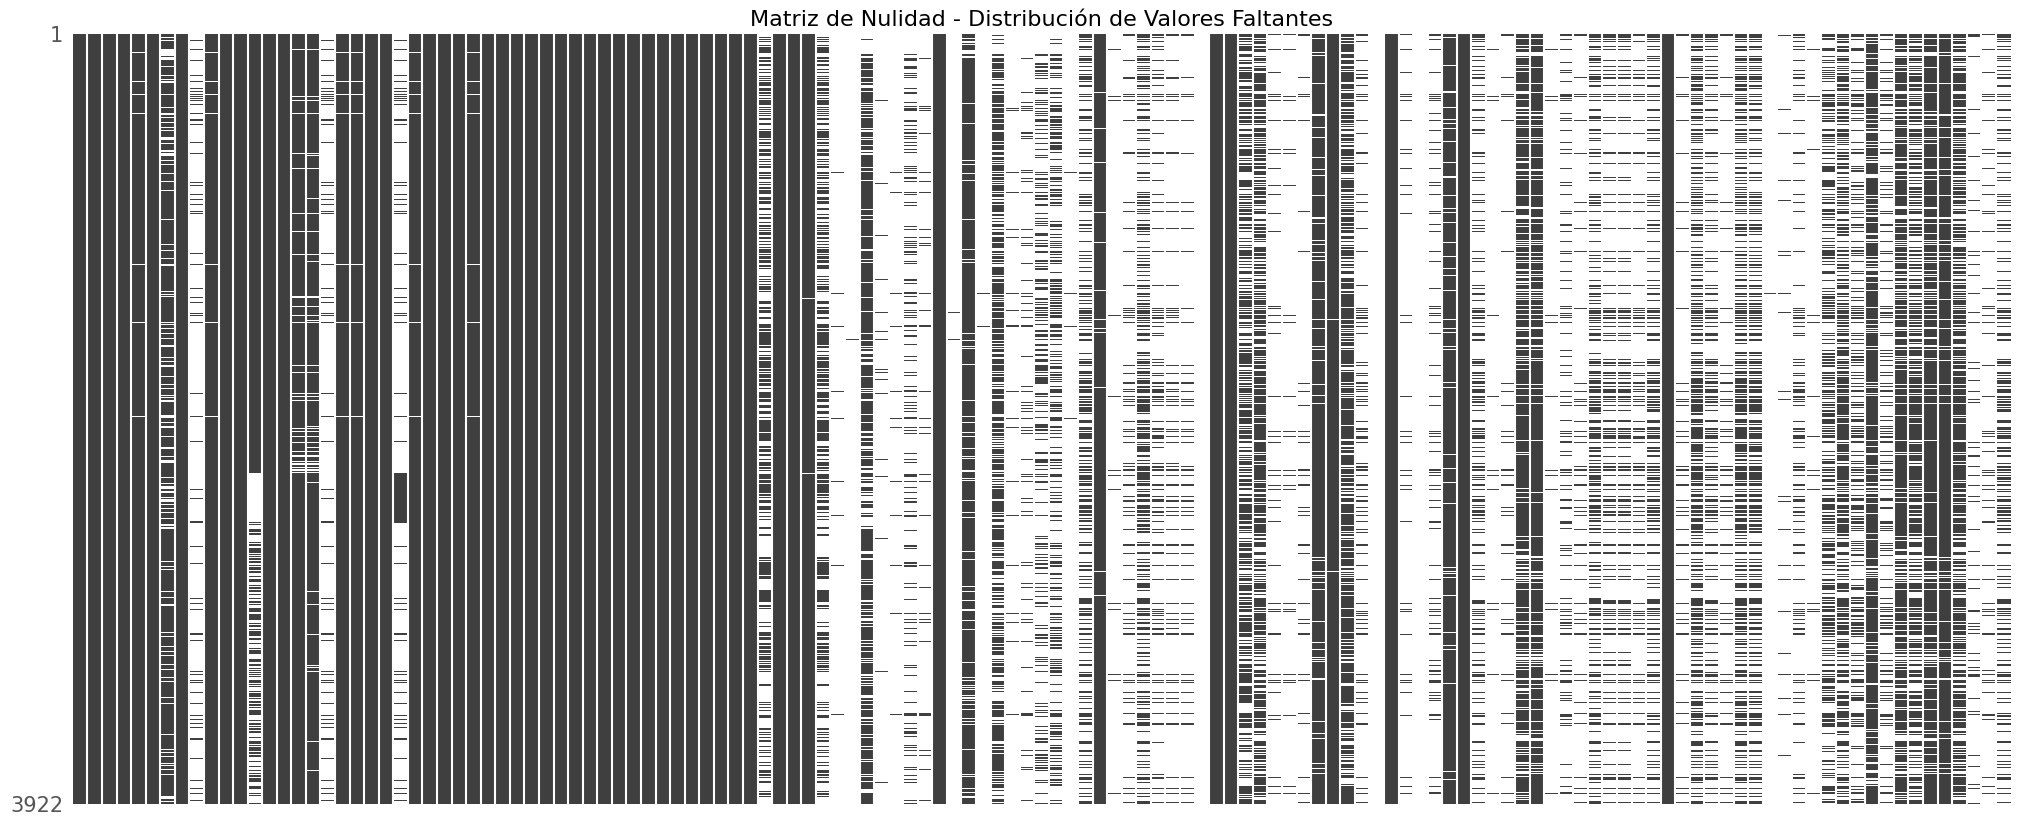


Estadísticas Detalladas de Valores Nulos:


,Columnas,Nulos,% Nulos
0,NEO_06,3922,100.00
1,NEO_05,3920,99.95
2,NEO_04,3919,99.92
3,PROC_05_DS5,3918,99.90
4,NEO_03,3912,99.75
...,...,...,...
88,F_INGRESO/ADMISSION_DATE_URG/EMERG,48,1.22
89,RESULTADO/VAL_RESULT,17,0.43
90,DIA_02_DS6,9,0.23
91,POAD_02,9,0.23


In [26]:
import missingno as msno
import matplotlib.pyplot as plt

# Configurar el estilo visual
plt.style.use('ggplot')

# 1. Matriz de nulidad (visualización general)
plt.figure(figsize=(25, 15))
msno.matrix(df_final, sparkline=False, fontsize=12)
plt.title("Matriz de Nulidad - Distribución de Valores Faltantes", fontsize=16)
plt.show()


# 2. Estadísticas detalladas de nulos
print("\n" + "="*50)
print("Estadísticas Detalladas de Valores Nulos:")
print("="*50)
null_stats = df_final.isnull().sum().sort_values(ascending=False)
null_stats = null_stats[null_stats > 0]
if len(null_stats) > 0:
    null_percent = (df_final.isnull().mean() * 100).round(2)
    null_summary = pd.DataFrame({
        'Columnas': null_stats.index,
        'Nulos': null_stats.values,
        '% Nulos': null_percent[null_stats.index].values
    })
    display(null_summary)
else:
    print("¡No hay valores nulos en tu dataset!")

In [27]:
# Obtener los valores únicos de la columna 'PATIENT ID'
unique_patient_ids = df_final['PATIENT ID'].unique()

# Ordenar los valores únicos de menor a mayor
sorted_unique_patient_ids = pd.Series(unique_patient_ids).sort_values().tolist()


# Imprimir la cantidad de valores únicos (será la misma)
print(f"Número total de valores únicos en la columna 'PATIENT ID': {len(sorted_unique_patient_ids)}")

# Mostrar los primeros 10 valores únicos ordenados (puedes ajustar el número si es necesario)
print("\nPrimeros 10 valores únicos de 'PATIENT ID' ordenados:")
print(sorted_unique_patient_ids[:10])

Número total de valores únicos en la columna 'PATIENT ID': 3922

Primeros 10 valores únicos de 'PATIENT ID' ordenados:
[1, 2, 4, 5, 6, 8, 9, 10, 11, 12]


In [28]:
# Analizar por subgrupos de completitud
complete_cases = df_final.dropna()
partial_cases = df_final[df_final.isnull().any(axis=1)]

In [30]:
partial_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Columns: 133 entries, GLU_PRIMERA/FIRST_URG/EMERG to DIA_11_DS6
dtypes: float64(1), int64(18), object(114)
memory usage: 4.0+ MB
